# Dependencies

In [2]:
pip install scikit-learn

In [3]:
pip install imbalanced-learn

In [5]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [6]:
df = pd.read_csv("spam.csv",encoding = "latin1")
df.shape

(5572, 5)

In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<h1> Data Cleaning </h1>

Steps:
* Separate columns;
* Rename columns;
* Convert categorical variable into numerical form - LabelEncoder()
* Detect null numbers;
* Detect duplicates;

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df = df.iloc[:,0:2]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.rename(columns={"v1": "target", "v2": "text"},inplace=True);
df.head()

<ipython-input-11-59affccc0761>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"v1": "target", "v2": "text"},inplace=True);


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
encoder = LabelEncoder()

In [13]:
df["target"] = encoder.fit_transform(df["target"]);

<ipython-input-13-d0fbefbd9ebd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = encoder.fit_transform(df["target"]);


In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df.drop_duplicates(keep="first",inplace=True)

<ipython-input-17-25176e58f993>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep="first",inplace=True)


In [18]:
df.shape

(5169, 2)

# Exploratory Data Analysis

Steps:

* Detecting data behaviour;

<Axes: xlabel='target', ylabel='count'>

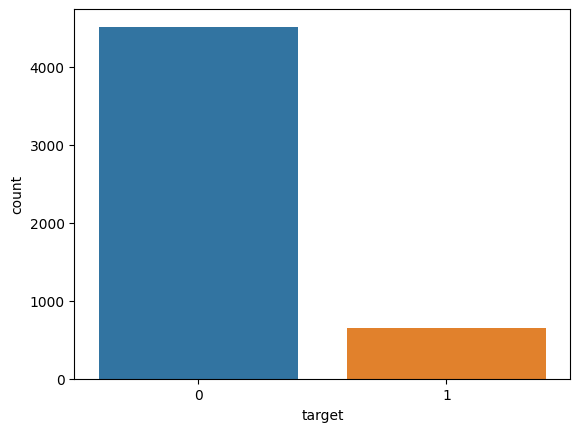

In [19]:
sns.countplot(x=df['target'])

In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

<h1> Data Preprocessing </h1>

Steps:
* Lowercase;
* Remove special characters;
* Remove stopwords and punctuation;
* Stemming;

In [21]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [22]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
ps = PorterStemmer()

In [24]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  filtered_text = [ps.stem(word) for word in text if word.isalnum() and  word not in stopwords.words('english') and word not in string.punctuation]

  return " ".join(filtered_text)


In [25]:
df["transform_text"] = df["text"].apply(transform_text)
df.head()

,target,text,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          5169 non-null   int64 
 1   text            5169 non-null   object
 2   transform_text  5169 non-null   object
dtypes: int64(1), object(2)
memory usage: 161.5+ KB


<h1>Model Building </h1>

In [27]:
X = df['transform_text'].values
X

array(['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
       'ok lar joke wif u oni',
       'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
       ..., 'piti mood suggest',
       'guy bitch act like interest buy someth els next week gave us free',
       'rofl true name'], dtype=object)

In [28]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [30]:
X_train.shape,y_train.shape

((4135,), (4135,))

In [31]:
tfidf = TfidfVectorizer(max_features=3000)

In [32]:
X_tfidf_train = tfidf.fit_transform(X_train).toarray()
X_tfidf_test = tfidf.transform(X_test).toarray()

In [33]:
model=GaussianNB()
model.fit(X_tfidf_train,y_train)

GaussianNB()

In [34]:
y_pred1 = model.predict(X_tfidf_test)

In [35]:
print(f"Accuracy Score:{accuracy_score(y_test,y_pred1)}")
print(f"Precision Score:{precision_score(y_test,y_pred1)}")
print(f"Confusion Matrix:{confusion_matrix(y_test,y_pred1)}")

Accuracy Score:0.8491295938104448
Precision Score:0.4524714828897338
Confusion Matrix:[[759 144]
 [ 12 119]]


<Axes: >

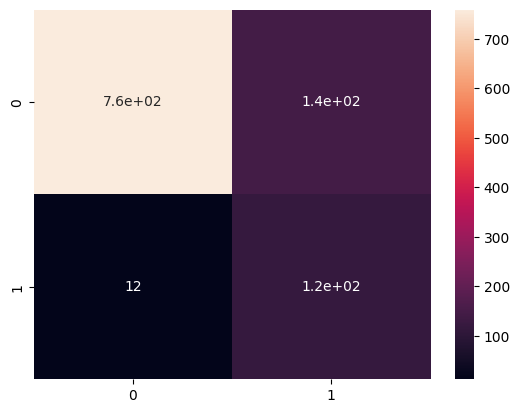

In [36]:
cm = confusion_matrix(y_test,y_pred1)
sns.heatmap(cm,annot = True)

# Imbalanced Data Problem

![text](https://miro.medium.com/v2/resize:fit:828/format:webp/1*7xf9e1EaoK5n05izIFBouA.png)

## Undersampling | Subamostragem

In [37]:
from imblearn.under_sampling import TomekLinks

In [38]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X_tfidf_train, y_train)

In [39]:
X_under.shape, y_under.shape

((4135, 3000), (4135,))

In [40]:
X_train_u, x_test_u,y_train_u,y_test_u = train_test_split(X_under,y_under,test_size=0.2,stratify=y_under)

In [41]:
X_train_u.shape,x_test_u.shape

((3308, 3000), (827, 3000))

In [42]:
model_u = GaussianNB()
model_u.fit(X_train_u,y_train_u)

predict_u = model_u.predict(x_test_u)

In [43]:
print(f"Accuracy Score:{accuracy_score(y_test_u,predict_u)}")
print(f"Precision Score:{precision_score(y_test_u,predict_u)}")
print(f"Confusion Matrix:{confusion_matrix(y_test_u,predict_u)}")

Accuracy Score:0.8778718258766627
Precision Score:0.5079365079365079
Confusion Matrix:[[630  93]
 [  8  96]]


## Oversampling | Sobreamostragem

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X_tfidf_train, y_train)

In [46]:
X_over.shape, y_over.shape

((7226, 3000), (7226,))

In [47]:
X_train_o,x_test_o, y_train_o, y_test_o = train_test_split(X_over,y_over,test_size=0.2,stratify=y_over)
X_train_o.shape,x_test_o.shape

((5780, 3000), (1446, 3000))

In [48]:
model_o = GaussianNB()
model_o.fit(X_train_o,y_train_o)

predict_o = model_o.predict(x_test_o)

In [49]:
print(f"Accuracy Score:{accuracy_score(y_test_o,predict_o)}")
print(f"Precision Score:{precision_score(y_test_o,predict_o)}")
print(f"Confusion Matrix:{confusion_matrix(y_test_o,predict_o)}")

Accuracy Score:0.9294605809128631
Precision Score:0.8763636363636363
Confusion Matrix:[[621 102]
 [  0 723]]
